In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import unidecode

In [19]:
# Load the shapefile
shapefile_path = "data/shapefiles/Communes"
communes_gdf = gpd.read_file(shapefile_path)

In [41]:
# Check the column names
print(communes_gdf.columns)


Index(['insee', 'nom', 'wikipedia', 'surf_ha', 'geometry', 'nom_cleaned'], dtype='object')


In [13]:
# Load the dataset with postal codes and commune names
dataset_path = "data/2- Formatted Data/full_stmt_dataset_cleaned.csv"
postal_codes_df = pd.read_csv(dataset_path)

/var/folders/5q/fx2dxhl52b3c_xdmrzcdb99m0000gn/T/ipykernel_2772/975037577.py:3: DtypeWarning: Columns (0,1,2,3,4,6,8,9,10,11,12,13,15,16,18,21,22,24,26,28,29,30,32,38,40,41,44,45,47,48,50,57,59,63,64,67,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,125,126,129,131,134,136,137,138,139,140,141,142,143,144,145,148,149,152,153,154,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,174,175,176,177,178,179,180,182,184,185,186,187,188,189,190,191,192,193,194,195,196,198,199,200,201,202,203,204,205,208,209,210,211,213,215,217,218,219,220,221,222,224,225,226,228,229,230,231,232,236,237,240,241,242,257,259,262,263,264,265,272,273,274,276,277,278,280,282,283,284,285,288,289,290,291,292,294,297,298,299,300,302,303,304,305,307,308,309,310,311,312,313,314,315,316,318,320,321,322,323,324,325,327,331,332,333,334,335,336,338,340,342,343,348,351,352,355,356

In [21]:
# Standardize commune names in the shapefile
communes_gdf["nom_cleaned"] = communes_gdf["nom"].apply(lambda x: unidecode.unidecode(x).lower())

# Standardize commune names in the CSV dataset
postal_codes_df["Commune de plus de 5000 hab Clean"] = postal_codes_df["Commune de plus de 5000 hab"].apply(lambda x: unidecode.unidecode(x).lower())

In [23]:
# Merge the dataframes on standardized commune names
merged_gdf = communes_gdf.merge(
    postal_codes_df,
    left_on="nom_cleaned",
    right_on="Commune de plus de 5000 hab Clean",
    how="left"
)


In [25]:
# Example: Group by postal code and list associated communes
grouped = merged_gdf.groupby("Postal Code")["nom"].apply(list).reset_index()


In [27]:
output_path = "data/3- Final Data/demand_communes.shp"
merged_gdf.to_file(output_path)

/var/folders/5q/fx2dxhl52b3c_xdmrzcdb99m0000gn/T/ipykernel_2772/1539463188.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_gdf.to_file(output_path)
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'nom_cleaned' to 'nom_cleane'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'A1101 : Conduite d'engins d'exploitation agricole et forestière' to 'A1101 _ Co'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'A1202 : Entretien des espaces naturels' to 'A1202 _ En'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'A1203 : Entretien des espaces verts' to 'A1203 _ En'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py

In [33]:
# Check the first few rows of the GeoDataFrame
print(gdf.head())

# List all columns
print(gdf.columns)



   insee           nom        wikipedia  surf_ha    nom_cleane A1101 _ Co  \
0  2B222  Pie-d'Orezza  fr:Pie-d'Orezza    573.0  pie-d'orezza       None   
1  2B137          Lano          fr:Lano    824.0          lano       None   
2  2B051        Cambia        fr:Cambia    833.0        cambia       None   
3  2B106        Ãrone        fr:Ãrone    393.0         erone       None   
4  2B185        Oletta        fr:Oletta   2674.0        oletta       None   

  A1201 _ BÃ A1202 _ En A1203 _ En A1204 _ Pr  ...  N4401 _ Ci N4402 _ Ex  \
0       None       None       None       None  ...         NaN       None   
1       None       None       None       None  ...         NaN       None   
2       None       None       None       None  ...         NaN       None   
3       None       None       None       None  ...         NaN       None   
4       None       None       None       None  ...         NaN       None   

   N4403 _ Ma ZZZZZ _ Au Total  Mois Commune de Postal Cod Commune _1  \
0

/var/folders/5q/fx2dxhl52b3c_xdmrzcdb99m0000gn/T/ipykernel_2772/3611762806.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mainland_gdf = gdf[gdf.geometry.centroid.y.between(41, 51) & gdf.geometry.centroid.x.between(-5, 10)]


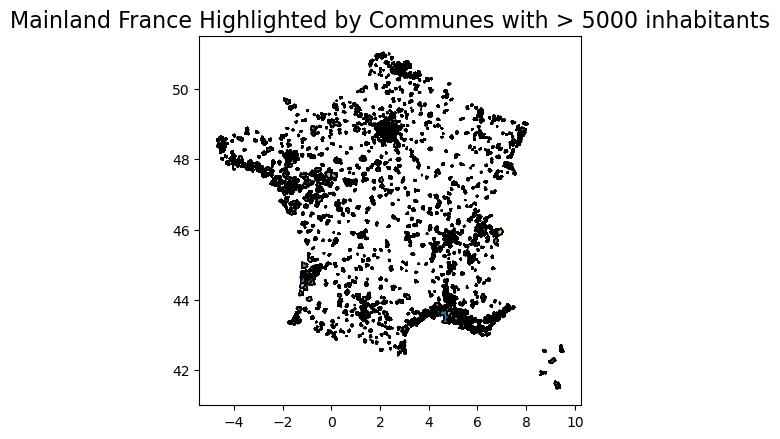

In [40]:
# Test: Visualizing the communes
# Filter for mainland France based on latitude/longitude bounds
mainland_gdf = gdf[gdf.geometry.centroid.y.between(41, 51) & gdf.geometry.centroid.x.between(-5, 10)]

# Plot mainland France with unique colors for each commune
mainland_gdf.plot(
    column="Commune de",          # The column name is "Commune de (has been truncated since it was initially too long)"
    cmap="tab20",          # Colormap for unique colors
    legend=False,
    edgecolor="black"
)

plt.title("Mainland France Highlighted by Communes with > 5000 inhabitants", fontsize=16)
plt.show()
